In [56]:
import requests as re
import os
from IPython.display import JSON
import pandas as pd
import json
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
import geopandas

ModuleNotFoundError: No module named 'geopandas'

### 1. Pull the data
various POIs in the area through API. 

In [2]:
#
key_fs = os.environ["FOURSQUARE_API_KEY"]
key_yelp = os.environ["Yelp_API_Key"]

base_fs = "https://api.foursquare.com"
path_fs = "/v3/places/search"
headers_fs = {
    "Accept": "application/json",
    "Authorization": key_fs
}

base_yelp = "https://api.yelp.com/"
path_yelp = "v3/businesses/search"
headers_yelp = {'Authorization': 'Bearer %s' % key_yelp,}

In [3]:
# transform params format
def trans_params_fs(category_id, city, fields, search_limit):
    """
    category_id type(str):
    city type(str):
    fields type(str): separated by comma WITHOUT space
    search_limit type(str): 
    """
    params = {
        'categories': category_id,
        'near': city,
        'fields': fields,
        'sort': 'rating',
        'limit': search_limit
    }
    return params

# transform params format
def trans_params_yelp(category, city, locale, search_limit):
    """
    category type(str): category name
    city type(str): 
    locale type(str): 'en_CA' stands for Canada
    search_limit type(str): 
    """
    params = {
        'categories': category,
        'location': city,
        'locale': locale,
        'sort_by': 'rating',
        'limit': search_limit
    }
    return params

In [4]:
#
def get_res(base, path, headers, params):
    """
    base type(str): API host
    path type(str): API searching path added after base
    headers type(dict):
    params type(dict): 
    """
    url = base+path
    res = re.get(url, headers=headers, params=params)
    return res.json()

In [5]:
# Chiropractor Info from Foursquare

params_fs1 = trans_params_fs('15006', 'Victoria,BC', 'name,location,hours,rating,popularity,price', '50')
res_fs1 = get_res(base_fs, path_fs, headers_fs, params_fs1)
JSON(res_fs1)

<IPython.core.display.JSON object>

In [6]:
# Chiropractor Info from Yelp

params_yelp1 = trans_params_yelp('chiropractors', 'Victoria,BC', 'en_CA', '50')
res_yelp1 = get_res(base_yelp, path_yelp, headers_yelp, params_yelp1)
JSON(res_yelp1)

<IPython.core.display.JSON object>

In [7]:
# Pet Stores Info from Foursquare

params_fs2 = trans_params_fs('17110', 'Victoria,BC', 'name,location,hours,rating,popularity,price', '50')
res_fs2 = get_res(base_fs, path_fs, headers_fs, params_fs2)
JSON(res_fs2)

<IPython.core.display.JSON object>

In [8]:
# Pet Stores Info from Yelp

params_yelp2 = trans_params_yelp('petstore', 'Victoria,BC', 'en_CA', '50')
res_yelp2 = get_res(base_yelp, path_yelp, headers_yelp, params_yelp2)
JSON(res_yelp2)

<IPython.core.display.JSON object>

In [9]:
# Chinese Restaurants Info from Foursquare

params_fs3 = trans_params_fs('13099', 'Victoria,BC', 'name,location,hours,rating,popularity,price', '50')
res_fs3 = get_res(base_fs, path_fs, headers_fs, params_fs3)
JSON(res_fs3)

<IPython.core.display.JSON object>

In [10]:
# Chinese Restaurants Info from Yelp

params_yelp3 = trans_params_yelp('chinese', 'Victoria,BC', 'en_CA', '50')
res_yelp3 = get_res(base_yelp, path_yelp, headers_yelp, params_yelp3)
JSON(res_yelp3)

<IPython.core.display.JSON object>

In [11]:
pd.json_normalize(res_yelp1['businesses']).head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,W6vrfL6oPVqLOnTDDH-bOw,diversified-health-clinic-victoria-2,Diversified Health Clinic,https://s3-media1.fl.yelpcdn.com/bphoto/AHABx6...,False,https://www.yelp.ca/biz/diversified-health-cli...,4,"[{'alias': 'acupuncture', 'title': 'Acupunctur...",5.0,[],...,48.423517,-123.355138,1063 Fort Street,,,Victoria,V8V 3K5,CA,BC,"[1063 Fort Street, Victoria, BC V8V 3K5]"
1,k7f0sFtNFeOi6ZtBFRNN3w,geometry-integrated-health-victoria,Geometry Integrated Health,https://s3-media4.fl.yelpcdn.com/bphoto/GtXAFm...,False,https://www.yelp.ca/biz/geometry-integrated-he...,3,"[{'alias': 'massage_therapy', 'title': 'Massag...",5.0,[],...,48.423130,-123.361660,827 Broughton Street,None,,Victoria,V8W 1E4,CA,BC,"[827 Broughton Street, Victoria, BC V8W 1E4]"
2,gxz_jJg4QTM2yKp1eRGu7w,equilibrium-massage-therapy-victoria,Equilibrium Massage Therapy,https://s3-media1.fl.yelpcdn.com/bphoto/jQVjAW...,False,https://www.yelp.ca/biz/equilibrium-massage-th...,3,"[{'alias': 'physicaltherapy', 'title': 'Physic...",5.0,[],...,48.424680,-123.352890,101-1121 Yates Street,,,Victoria,V8V 3N1,CA,BC,"[101-1121 Yates Street, Victoria, BC V8V 3N1]"
3,ma7VsFU0lSvYNx8OQGi8Ag,synergy-victoria,Synergy Health Centre,https://s3-media3.fl.yelpcdn.com/bphoto/I3GA4f...,False,https://www.yelp.ca/biz/synergy-victoria?adjus...,3,"[{'alias': 'chiropractors', 'title': 'Chiropra...",5.0,[],...,48.468230,-123.363934,106-3960 Quadra Street,,,Victoria,V8X 4A3,CA,BC,"[106-3960 Quadra Street, Victoria, BC V8X 4A3]"
4,UOajI9hib9FZkWxgqZNIVQ,juniper-family-health-victoria,Juniper Family Health,https://s3-media2.fl.yelpcdn.com/bphoto/vOsXOE...,False,https://www.yelp.ca/biz/juniper-family-health-...,2,"[{'alias': 'naturopathic', 'title': 'Naturopat...",5.0,[],...,48.423900,-123.353400,1175 Cook Street,Suite 314,,Victoria,V8V 4A1,CA,BC,"[1175 Cook Street, Suite 314, Victoria, BC V8V..."


In [12]:
df_yelp1 = pd.json_normalize(res_yelp1['businesses'])[['name', 'rating', 'review_count', 'location.zip_code', 'location.address1']]
df_yelp2 = pd.json_normalize(res_yelp2['businesses'])[['name', 'rating', 'review_count', 'location.zip_code', 'location.address1']]
df_yelp3 = pd.json_normalize(res_yelp3['businesses'])[['name', 'rating', 'review_count', 'location.zip_code', 'location.address1']]

df_yelp1[['category', 'category_id']] = ['Chiropractor', 1]
df_yelp2[['category', 'category_id']] = ['Pet Store', 2]
df_yelp3[['category', 'category_id']] = ['Chinese Restaurant', 3]

df_yelp = pd.concat([df_yelp1, df_yelp2, df_yelp3])
df_yelp.head()

,name,rating,review_count,location.zip_code,location.address1,category,category_id
0,Diversified Health Clinic,5.0,4,V8V 3K5,1063 Fort Street,Chiropractor,1
1,Geometry Integrated Health,5.0,3,V8W 1E4,827 Broughton Street,Chiropractor,1
2,Equilibrium Massage Therapy,5.0,3,V8V 3N1,101-1121 Yates Street,Chiropractor,1
3,Synergy Health Centre,5.0,3,V8X 4A3,106-3960 Quadra Street,Chiropractor,1
4,Juniper Family Health,5.0,2,V8V 4A1,1175 Cook Street,Chiropractor,1


In [13]:
df_yelp.shape

(87, 7)

In [14]:
type(df_yelp.iloc[0,0])

str

In [15]:
df_yelp['name'].dtypes

dtype('O')

### 2. Create own SQLite database and store the data about the POIs. 

In [16]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection
connection = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


In [17]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
    except Error as e:
        print(f"The error '{e}' occurred")

In [18]:
drop_POI = "DROP TABLE IF EXISTS POI;"
drop_categories = "DROP TABLE IF EXISTS categories;"
drop_ratings = "DROP TABLE IF EXISTS ratings;"
drop_locations = "DROP TABLE IF EXISTS locations;"

execute_query(connection, drop_POI)
execute_query(connection, drop_categories)
execute_query(connection, drop_ratings)        
execute_query(connection, drop_locations)        


# create table POI (places of interest)
create_POI_table = """
    CREATE TABLE POI (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT
    );
"""
# create table categories (of POI)
create_categories_table = """
    CREATE TABLE categories (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT
    );
"""

# create table categories (of POI)
create_ratings_table = """
    CREATE TABLE ratings (
        business_id INTEGER PRIMARY KEY AUTOINCREMENT,
        category_id INTEGER,
        rating FLOAT,
        review_count INTEGER
    );
"""

create_locations_table = """
    CREATE TABLE locations (
        business_id INTEGER PRIMARY KEY AUTOINCREMENT,
        address TEXT,
        zipcode TEXT
    )

"""

execute_query(connection, create_POI_table)
execute_query(connection, create_categories_table)
execute_query(connection, create_ratings_table)
execute_query(connection, create_locations_table)        

In [19]:
#
insert_categories = f"""
    INSERT INTO categories (name)
    VALUES
        ('Chiropractor'),
        ('Pet Store'),
        ('Chinese Restaurant')
    ;
"""
execute_query(connection, insert_categories)

#
for i, row in df_yelp.iterrows():
    
    insert_POI = f"""
        INSERT INTO POI (name)
        VALUES ("{row['name']}")
        ;
    """
    insert_ratings = f"""
        INSERT INTO ratings (category_id, rating, review_count)
        VALUES ({row['category_id']}, {row['rating']}, {row['review_count']})
        ;
    """
    insert_locations = f"""
        INSERT INTO locations (address, zipcode)
        VALUES ("{row['location.address1']}", "{row['location.zip_code']}")
    """

    execute_query(connection, insert_POI)
    execute_query(connection, insert_ratings)
    execute_query(connection, insert_locations)

### 3. Compare the results and see which API has a better coverage of the area.

In [20]:
df_fs1 = pd.json_normalize(res_fs1['results'])[['name', 'popularity', 'location.address', 'location.postcode']] 
df_fs2 = pd.json_normalize(res_fs2['results'])[['name', 'popularity', 'location.address', 'location.postcode']] 
df_fs3 = pd.json_normalize(res_fs3['results'])[['name', 'popularity', 'location.address', 'location.postcode']] 

df_fs1['category'] = 'Chiropractor'
df_fs2['category'] = 'Pet Store'
df_fs3['category'] = 'Chinese Restaurant'

df_fs = pd.concat([df_fs1, df_fs2, df_fs3])
df_fs.head()

,name,popularity,location.address,location.postcode,category
0,UC Life Chiropractic Centre,0.077949,1113 Langley St,V8W 1V9,Chiropractor
1,Fix Healthcare,0.918929,805 Johnson St,V8W 1N4,Chiropractor
2,Elder Chiropractic Office,0.438866,1116 Blanshard St,V8W 2H6,Chiropractor
3,Coastal Chiropractic,0.427696,2950 Douglas St,V8T 4N4,Chiropractor
4,Diversified Health Clinic Ltd,0.888061,1063 Fort St,V8V 3K5,Chiropractor


In [21]:
FourSquare = df_fs[['name', 'category']].groupby('category', as_index=False).count()
FourSquare['API'] = 'FourSquare'
FourSquare

,category,name,API
0,Chinese Restaurant,31,FourSquare
1,Chiropractor,9,FourSquare
2,Pet Store,16,FourSquare


In [22]:
Yelp = df_yelp[['name', 'category']].groupby('category', as_index=False).count()
Yelp['API'] = 'Yelp'
Yelp

,category,name,API
0,Chinese Restaurant,50,Yelp
1,Chiropractor,18,Yelp
2,Pet Store,19,Yelp


In [23]:
df = pd.concat([FourSquare, Yelp])
df.rename(columns={'name': 'Count'}, inplace=True)
df

,category,Count,API
0,Chinese Restaurant,31,FourSquare
1,Chiropractor,9,FourSquare
2,Pet Store,16,FourSquare
0,Chinese Restaurant,50,Yelp
1,Chiropractor,18,Yelp
2,Pet Store,19,Yelp


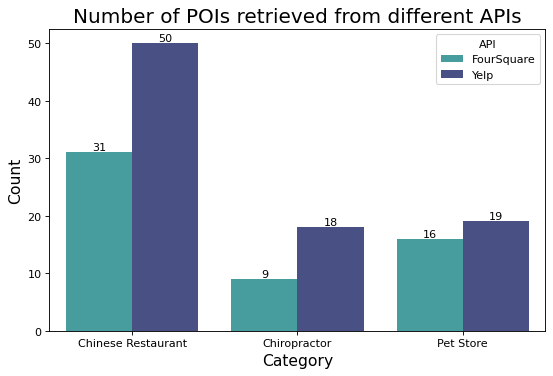

In [24]:
plt.figure(figsize=(8, 5), dpi=80)
comp = sns.barplot(x='category', y='Count', hue='API', data=df, palette="mako_r")
for container in comp.containers:
    comp.bar_label(container)
plt.title('Number of POIs retrieved from different APIs', fontsize=18)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


### 4. Choose the top 10 POIs based on the popularity

In [25]:
df_yelp1[['name','rating']].sort_values('rating', ascending=False).head(10)

,name,rating
0,Diversified Health Clinic,5.0
7,Murray Chiropractic Group,5.0
12,"Martell Bruce, RMT",5.0
11,"Richard Kjaer, DC",5.0
10,Emmanuel Parenteau,5.0
1,Geometry Integrated Health,5.0
8,The Athlete Centre,5.0
9,Wholistic Chiropractic & Wellness,5.0
4,Juniper Family Health,5.0
3,Synergy Health Centre,5.0


In [26]:
df_fs1[['name', 'popularity']].sort_values('popularity', ascending=False).head(10)

,name,popularity
1,Fix Healthcare,0.918929
4,Diversified Health Clinic Ltd,0.888061
6,Active Health & Wellness Clinic,0.842421
2,Elder Chiropractic Office,0.438866
3,Coastal Chiropractic,0.427696
5,Fairfield Chiropractic & Massage,0.254144
8,Victoria Family Chiropractic,0.214991
7,Dr. Jack Chin,0.207903
0,UC Life Chiropractic Centre,0.077949


In [27]:
pd.merge(df_yelp1[['name','rating']], df_fs1[['name', 'popularity']], on='name')

,name,rating,popularity
0,Active Health & Wellness Clinic,3.0,0.842421


In [28]:
df_yelp3[['name','rating']].sort_values('rating', ascending=False).head(10)

,name,rating
26,Pho & Wok,5.0
40,Panda Island,5.0
0,Little Yunnan Restaurant,4.5
2,Lotus Pond Vegetarian Restaurant,4.5
1,The Cozy Place Restaurant,4.5
4,Hope Key,4.5
6,Ox King Noodles,4.5
34,Laila Laila Hotpot Restaurant,4.0
27,Rainbow Chinese Restaurant,4.0
11,Lum's Chinese Restaurant,4.0


In [29]:
df_fs3[['name', 'popularity']].sort_values('popularity', ascending=False).head(10)

,name,popularity
6,Don Mee Chinese Seafood Restaurant,0.954360
4,Fan-Tan Cafe,0.951718
1,J & J Wonton Noodle House,0.940668
21,Sun Wah Chinese Restaurant,0.922051
10,Wah Lai Yuen Restaurant,0.919890
22,Crown Palace Chinese Restaurant,0.917367
13,Ox King Noodles,0.916406
29,Hongkong West Restaurant,0.910882
15,Szechuan Restaurant,0.907639
2,Hope Key Restaurant,0.899231


In [30]:
pd.merge(df_yelp3[['name','rating']], df_fs3[['name', 'popularity']], on='name')

,name,rating,popularity
0,Little Yunnan Restaurant,4.5,0.867403
1,Lotus Pond Vegetarian Restaurant,4.5,0.893706
2,Ox King Noodles,4.5,0.916406
3,I Kyu Noodles,3.5,0.863680
4,Golden City Restaurant,3.5,0.869085
5,J & J Wonton Noodle House,3.5,0.940668
6,Beijing Bistro,3.5,0.797021
7,Sun Wah Chinese Restaurant,3.5,0.922051
8,Szechuan Restaurant,3.5,0.907639
9,James Bay Fish & Chips,3.0,0.822964


In [31]:
pd.merge(df_yelp3['name'], df_fs3['name'], on='name').shape

(13, 1)

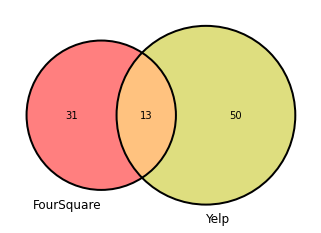

In [32]:
venn2(subsets = (31, 50, 13), set_labels = ('FourSquare', 'Yelp'), set_colors=('r', 'y'), alpha = 0.5);
venn2_circles(subsets = (31, 50, 13));

In [36]:
rating_fs = pd.json_normalize(res_fs3['results'])[['name', 'rating']]
rating_merge = pd.merge(df_yelp3[['name', 'rating']], rating_fs, on='name')
rating_merge['API'] = 'Yelp'
rating_fs = rating_merge.copy()[['name', 'rating_y']]
rating_fs['API'] = 'FourSquare'
rating_yelp = rating_merge.copy()[['name', 'rating_x', 'API']]
rating_yelp['rating_x'] = rating_yelp['rating_x']*2

rating_fs.rename(columns={'rating_y': 'rating'}, inplace=True)
rating_yelp.rename(columns={'rating_x': 'rating'}, inplace=True)

rating = pd.concat([rating_fs, rating_yelp]).sort_values('rating', ascending=False)
rating

,name,rating,API
0,Little Yunnan Restaurant,9.0,Yelp
1,Lotus Pond Vegetarian Restaurant,9.0,Yelp
2,Ox King Noodles,9.0,Yelp
1,Lotus Pond Vegetarian Restaurant,8.2,FourSquare
5,J & J Wonton Noodle House,7.9,FourSquare
5,J & J Wonton Noodle House,7.0,Yelp
8,Szechuan Restaurant,7.0,Yelp
7,Sun Wah Chinese Restaurant,7.0,Yelp
6,Beijing Bistro,7.0,Yelp
4,Golden City Restaurant,7.0,Yelp


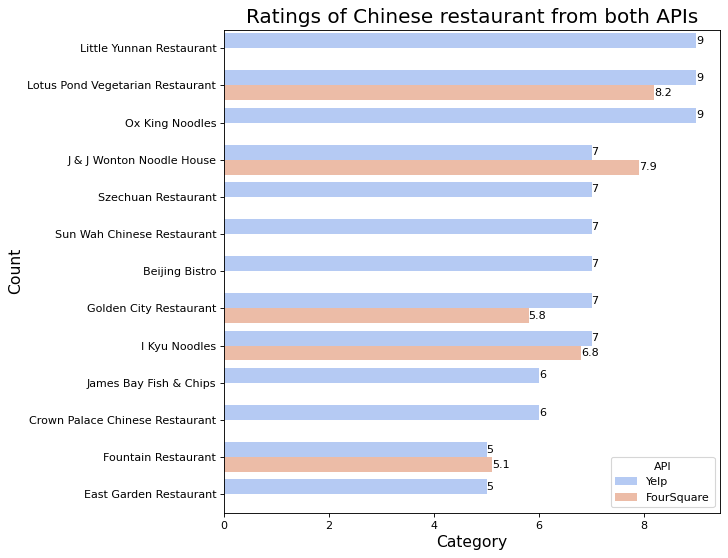

In [37]:
plt.figure(figsize=(8, 8), dpi=80)
comp = sns.barplot(x='rating', y='name', hue='API', data=rating, palette="coolwarm", orient='h')
for container in comp.containers:
    comp.bar_label(container)
plt.title('Ratings of Chinese restaurant from both APIs', fontsize=18)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [47]:
pc_fs3 = df_fs3[['name', 'location.postcode']].copy()
pc_fs3.head()

,name,location.postcode
0,Lotus Pond Vegetarian Restaurant,V8W 1M5
1,J & J Wonton Noodle House,V8V 3K4
2,Hope Key Restaurant,V8W 2E9
3,I Kyu Noodles,V8W 1R4
4,Fan-Tan Cafe,V8W 1R5


In [48]:
pc_yelp3 = df_yelp3[['name', 'location.zip_code']].copy()
pc_yelp3.head()

,name,location.zip_code
0,Little Yunnan Restaurant,V8W 1R4
1,The Cozy Place Restaurant,V8W 2G6
2,Lotus Pond Vegetarian Restaurant,V8W 1M5
3,Bao,V8W 1R6
4,Hope Key,V8W 2E9


In [55]:
pc_yelp3['location.zip_code'] = pc_yelp3['location.zip_code'].apply(lambda x: x[:3])
pc_yelp3.groupby('location.zip_code').count()

,name
location.zip_code,
V8N,1
V8P,5
V8R,5
V8T,4
V8V,3
V8W,19
V8X,2
V8Z,5
V9A,5
